<a href="https://colab.research.google.com/github/yumkim1016/TP1/blob/main/Multi_data_sumup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[다중분류모델] 철판제조 공정 중 불량판별

## 0. 들어가기에 앞서..
 해당 데이터는 제조 공정데이터로, 불량률을 예측하여 불량을 일으키는 원인을 제거하거나 재고를 예측하여 수요에 맞는 생산을 진행하는 등의 목적성에 의하여 만들어졌습니다.
 * 제조공정데이터의 특징으로는 결측치가 없다는 특징이 있습니다.



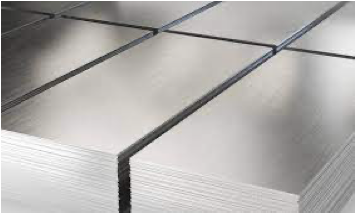

## 1. 데이터 소개
- 데이터 수: 전처리 전 1,941 / 전처리 후 1,941
- 특성(feature): 27개 / dtypes: int, float
  - X_Minimum: 객체의 경계 상단에서 가장 왼쪽 점의 x 좌표
  - X_Maximum: 객체의 경계 상단에서 가장 오른쪽 점의 x 좌표
  - Y_Minimum: 객체의 경계 상단에서 가장 왼쪽 점의 y 좌표
  - Y_Maximum: 객체의 경계 상단에서 가장 오른쪽 점의 y 좌표
  - Pixels_Areas: 객체 영역에 있는 픽셀의 수
  - X_Perimeter:  객체의 경계 상단의 가로 길이
  - Y_Perimeter: 객체의 경계 상단의 세로 길이
  - Sum_of_Luminosity: 영역 내 픽셀의 총 밝기 합
  - Minimum_of_Luminosity: 최소 밝기
  - Maximum_of_Luminosity: 최대 밝기
  - Length_of_Conveyer: 컨베이어의 길이
  - TypeOfSteel_A300: 강철의 유형이 A300형인지에 대한 여부(맞으면 1, 아니면 0)
  - TypeOfSteel_A400: 강철의 유형이 A400형인지에 대한 여부(맞으면 1, 아니면 0)
  - Steel_Plate_Thickness: 강판의 두께
  - Edges_Index: 가장자리 지수(객체의 경계 부분의 픽셀 수와 객체 영역 내의 픽셀 수의 비율)
  - Empty_Index: 빈 공간 지수(객체 영역 내에서 비어 있는 픽셀의 수와 객체 영역 내의 픽셀 수의 비율)
  - Square_Index: 정사각형 지수(객체 영역의 넓이와 가장 왼쪽 점과 오른쪽 점 사이의 거리의 비율)
  - Outside_X_Index: X 외부 지수(객체 영역 외부의 픽셀 수와 객체 영역 내의 픽셀 수의 비율 (가로 방향))
  - Edges_X_Index: X 가장자리 지수(객체의 경계 부분에서 왼쪽 경계와 오른쪽 경계 사이의 거리와 객체 영역의 가로 길이의 비율)
  - Edges_Y_Index: Y 가장자리 지수(객체의 경계 부분에서 상단 경계와 하단 경계 사이의 거리와 객체 영역의 세로 길이의 비율)
  - Outside_Global_Index: 전체영역의 외부 지수(객체 영역 외부의 픽셀 수와 객체 영역 내의 픽셀 수의 비율 (전체 영역))
  - LogOfAreas: 객체 영역의 로그값
  - Log_X_Index: 로그 X의 지수(객체의 경계 부분에서 왼쪽 경계와 오른쪽 경계 사이의 거리의 로그값)
  - Log_Y_Index: 로그 Y의 지수(객체의 경계 부분에서 상단 경계와 하단 경계 사이의 거리의 로그값)
  - Orientation_Index: (모양) 방향 지수
  - Luminosity_Index: 밝기의 분포 지수
    - 일반적으로 -1은 어두운 영역 ~ 1은 밝은 영역을 나타냄
  - SigmoidOfAreas: 해당 영역의 시그모이드 변환값
- 타겟(target): 불량사유 7개 (해당하면 1, 아니면 0) / dtype: int 
  - Pastry, 페이스트리 불량
  - Z_Scratch, Z모양의 스크래치 불량
  - K_Scatch: K모양의 스크래치 불량
  - Stains: 얼룩 존재
  - Dirtiness: 더러움
  - Bumps: 돌출부위 존재
  - Other_Faults: 기타 불량

In [ ]:
!pip3 install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from collections import Counter
from matplotlib import pyplot
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
import eli5

In [ ]:
df = pd.read_csv('mulit_classification_data.csv')

In [ ]:
print("[데이터 shape]", df.shape, "\n[데이터 info]")
df.info()

[데이터 shape] (1941, 34) 
[데이터 info]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index          

## 2. 데이터 전처리 및 EDA

### 기본검사

In [ ]:
# 결측치 검사
df.isnull().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [ ]:
# 중복데이터 검사
df.duplicated().sum()

0

In [ ]:
# 통계치 확인
df.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**어떤 종류의 불량** 이 나는지에대한 판별이 목적이기 때문에 해당 불량종류를 담은 target column을 만들어준다.

In [ ]:
targets = df[-7:]
conditions = [df['Pastry'].astype(bool),df['Z_Scratch'].astype(bool),df['K_Scatch'].astype(bool),df['Stains'].astype(bool),
              df['Dirtiness'].astype(bool),df['Bumps'].astype(bool),df['Other_Faults'].astype(bool)]
conditions

[0        True
 1        True
 2        True
 3        True
 4        True
         ...  
 1936    False
 1937    False
 1938    False
 1939    False
 1940    False
 Name: Pastry, Length: 1941, dtype: bool,
 0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 1936    False
 1937    False
 1938    False
 1939    False
 1940    False
 Name: Z_Scratch, Length: 1941, dtype: bool,
 0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 1936    False
 1937    False
 1938    False
 1939    False
 1940    False
 Name: K_Scatch, Length: 1941, dtype: bool,
 0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 1936    False
 1937    False
 1938    False
 1939    False
 1940    False
 Name: Stains, Length: 1941, dtype: bool,
 0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 1936    False
 1937    False
 1938    False
 1939    False
 1940    False
 N

In [ ]:
choices = list(df.columns[-7:])
choices

['Pastry',
 'Z_Scratch',
 'K_Scatch',
 'Stains',
 'Dirtiness',
 'Bumps',
 'Other_Faults']

In [ ]:
df['class'] = np.select(conditions,choices)
df['class']

0             Pastry
1             Pastry
2             Pastry
3             Pastry
4             Pastry
            ...     
1936    Other_Faults
1937    Other_Faults
1938    Other_Faults
1939    Other_Faults
1940    Other_Faults
Name: class, Length: 1941, dtype: object

In [ ]:
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,class
0,42,50,270900,270944,267,17,44,24220,76,108,...,-0.2913,0.5822,1,0,0,0,0,0,0,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,-0.1756,0.2984,1,0,0,0,0,0,0,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,-0.1228,0.2150,1,0,0,0,0,0,0,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,-0.1568,0.5212,1,0,0,0,0,0,0,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,-0.1992,1.0000,1,0,0,0,0,0,0,Pastry


In [ ]:
df['class'].value_counts()

Other_Faults    673
Bumps           402
K_Scatch        391
Z_Scratch       190
Pastry          158
Stains           72
Dirtiness        55
Name: class, dtype: int64

### Feature Importance / Permutation Importance

In [ ]:
# Feature Importance

features = df.iloc[:, :-8]
target = df.iloc[:, -1]

# 랜덤 포레스트 분류기 모델 생성
rf = RandomForestClassifier(random_state=42)
rf.fit(features, target)

# Feature importance 계산
importances = rf.feature_importances_

# 결과 출력
for feature, importance in zip(features.columns, importances):
  print(f'{feature}: {importance}')

X_Minimum: 0.04266569748333514
X_Maximum: 0.04161194435545406
Y_Minimum: 0.032166138112959264
Y_Maximum: 0.03501016186567005
Pixels_Areas: 0.04851292934437915
X_Perimeter: 0.03359047988864171
Y_Perimeter: 0.02531824629639783
Sum_of_Luminosity: 0.04421638566538687
Minimum_of_Luminosity: 0.03562242578119147
Maximum_of_Luminosity: 0.032570023976018006
Length_of_Conveyer: 0.07082898375420545
TypeOfSteel_A300: 0.021958603567387158
TypeOfSteel_A400: 0.02239573981847384
Steel_Plate_Thickness: 0.05091208316951712
Edges_Index: 0.03533908648146952
Empty_Index: 0.03148473711619342
Square_Index: 0.03302838819951919
Outside_X_Index: 0.047417488144093106
Edges_X_Index: 0.02959147793419154
Edges_Y_Index: 0.03491309797005437
Outside_Global_Index: 0.002004269372651816
LogOfAreas: 0.06775773392733973
Log_X_Index: 0.056028485588355874
Log_Y_Index: 0.0249818333176555
Orientation_Index: 0.035739007890662124
Luminosity_Index: 0.03207370550726223
SigmoidOfAreas: 0.03226084547153464


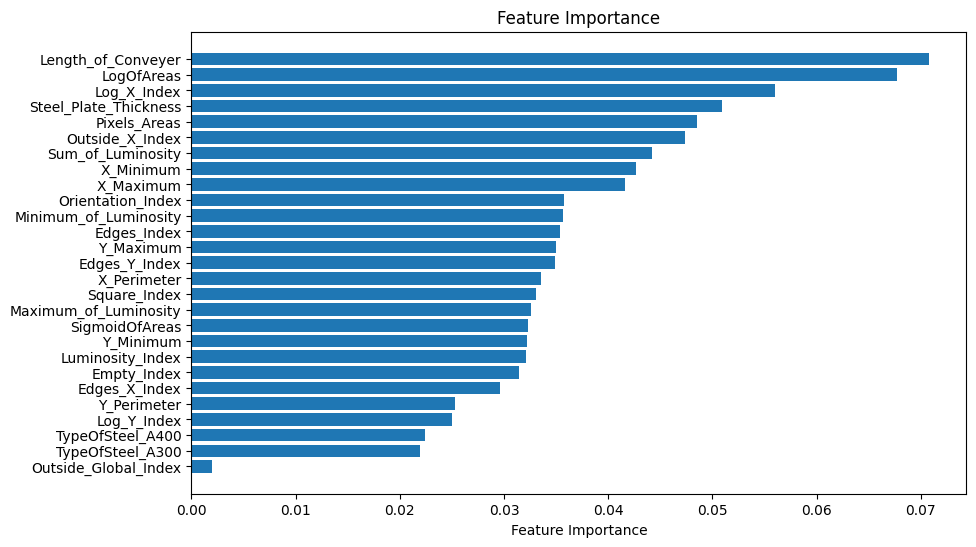

In [ ]:
# bar plot으로 결과 시각화, 높은순서대로 표시

feature_names = features.columns
sorted_indices = np.argsort(importances)
pos = np.arange(sorted_indices.shape[0]) + 0.5

plt.figure(figsize=(10, 6))
plt.barh(pos, importances[sorted_indices], align='center')
plt.yticks(pos, feature_names[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
# feature importance는 high cardinality에 취약하기때문에, high cardinality로 인한 결과인지 확인이 꼭 필요하다

features.nunique()

X_Minimum                 962
X_Maximum                 994
Y_Minimum                1939
Y_Maximum                1940
Pixels_Areas              920
X_Perimeter               399
Y_Perimeter               317
Sum_of_Luminosity        1909
Minimum_of_Luminosity     161
Maximum_of_Luminosity     100
Length_of_Conveyer         84
TypeOfSteel_A300            2
TypeOfSteel_A400            2
Steel_Plate_Thickness      24
Edges_Index              1387
Empty_Index              1338
Square_Index              770
Outside_X_Index           454
Edges_X_Index             818
Edges_Y_Index             648
Outside_Global_Index        3
LogOfAreas                914
Log_X_Index               183
Log_Y_Index               217
Orientation_Index         918
Luminosity_Index         1522
SigmoidOfAreas            388
dtype: int64

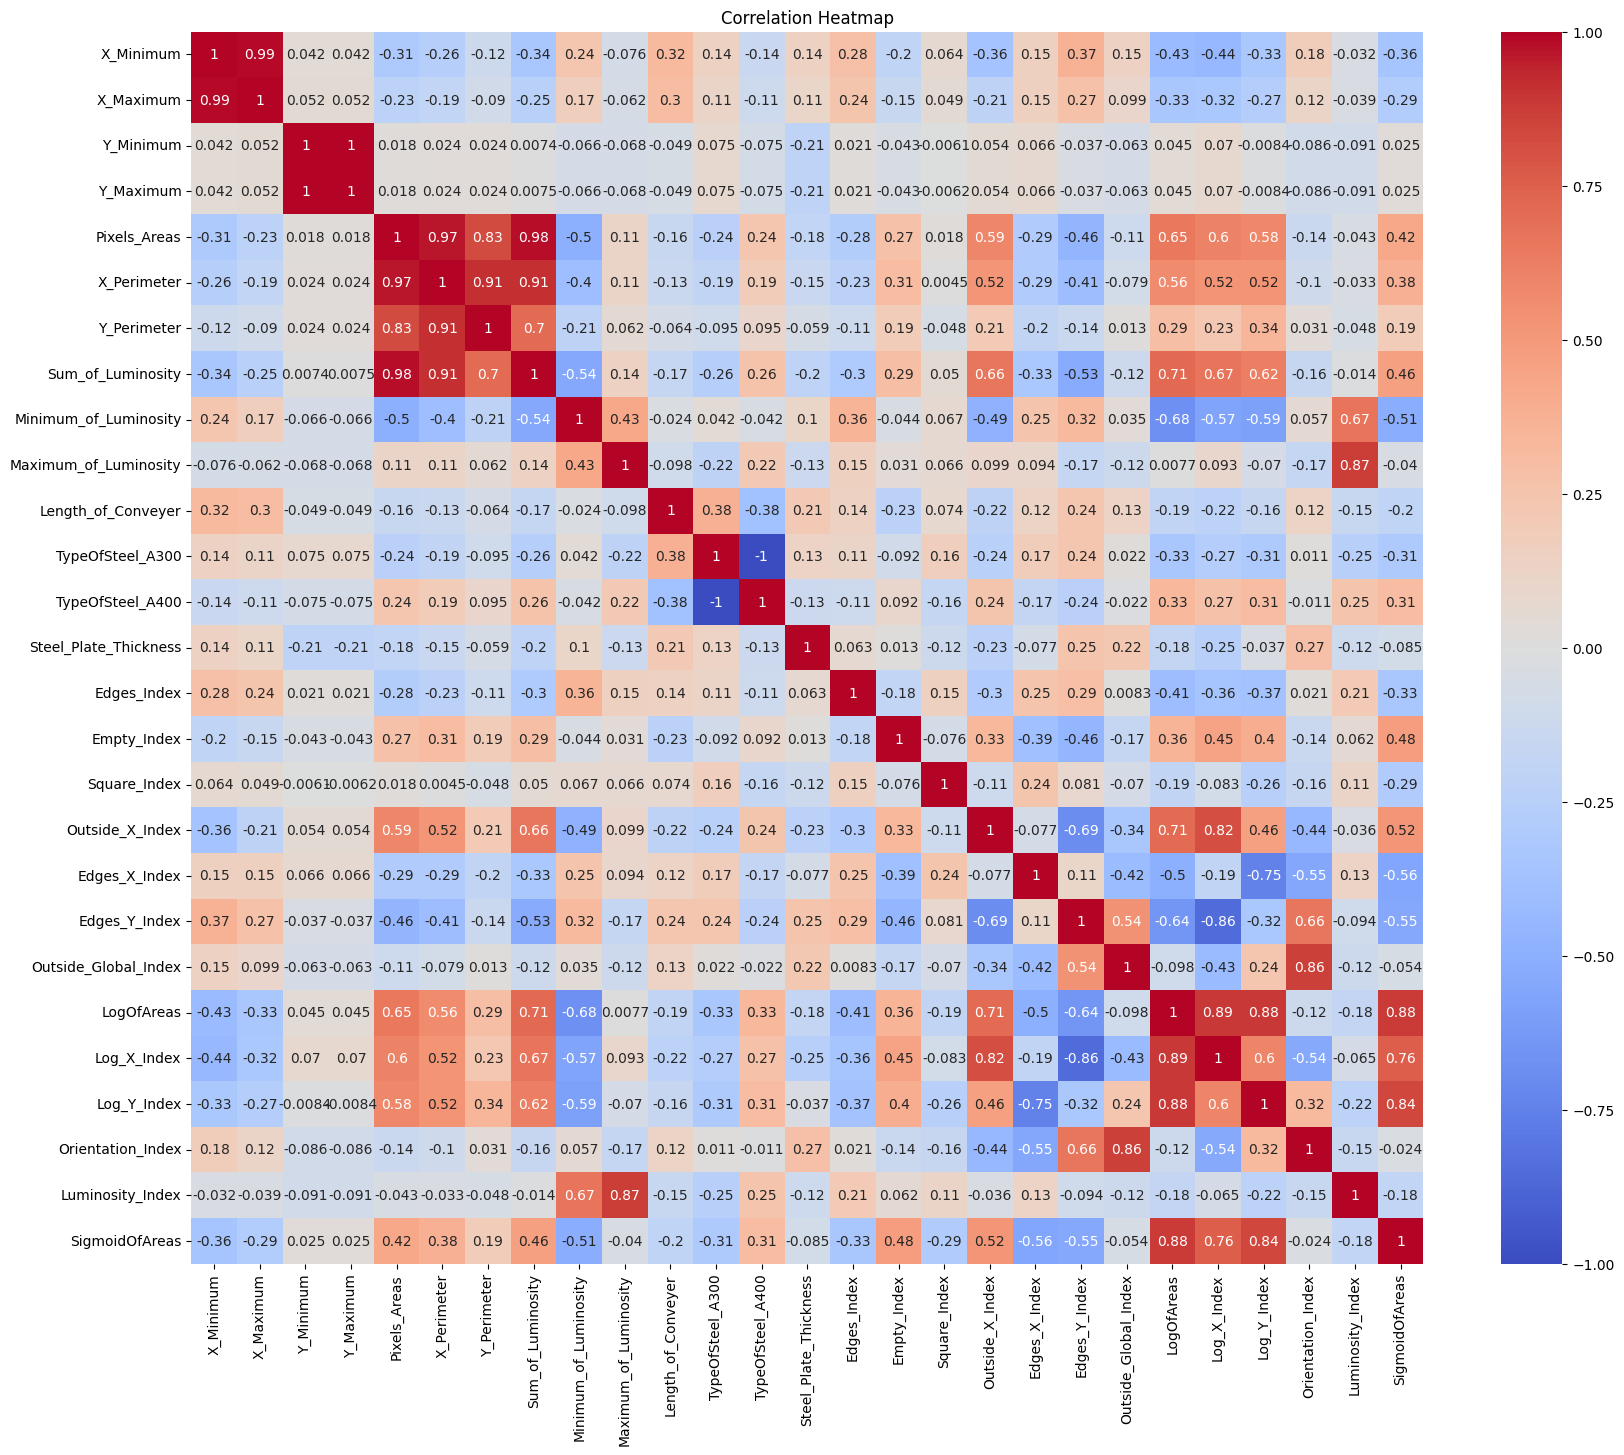

In [ ]:
# Heatmap

# 상관관계 계산
correlation_matrix = features.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(20,16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# df 두 종류로 나누어 테스트(csv저장x)
df_basic = df.copy() # fi를 통해 column drop을 안 한 데이터
df_fi = df.drop('Outside_Global_Index', axis=1) # fi를 통해 가장 낮은 계수를 보이는 column을 1개 드롭한 데이터

### Scaling(StandardScaler)

In [ ]:
# df_basic scaling

features = df_basic.columns[:-8]
target = df_basic.columns[-1] #target은 구분되어있는 class 컬럼 하나만

X = df_basic[features]
y = df_basic[target]

X_basic_train, X_basic_test,y_basic_train, y_basic_test = train_test_split(X, y, test_size= 0.2, random_state = 42, stratify = y)
X_basic_train, X_basic_val, y_basic_train, y_basic_val = train_test_split(X_basic_train, y_basic_train, test_size = 0.2, random_state = 42, stratify = y_basic_train)

In [ ]:
scaler = StandardScaler()
scaler.fit_transform(X_basic_train)
scaler.transform(X_basic_val)
scaler.transform(X_basic_test)

array([[ 0.52588932,  0.49960863, -0.42169697, ...,  1.48390851,
         0.72474457,  1.23420844],
       [ 0.09726232,  0.01949907,  0.25531911, ...,  0.69661189,
         0.32635478, -1.0812678 ],
       [ 0.91341511,  0.88738943, -0.58919715, ..., -0.43247223,
        -0.56531154, -0.87182178],
       ...,
       [ 0.42215767,  0.35803786, -0.36510181, ...,  1.50386258,
         0.03496496, -0.25535033],
       [-1.02029941, -0.81556329, -0.25463702, ..., -0.16161058,
         0.2819397 ,  1.23420844],
       [ 0.53371813,  0.52422963, -0.51951308, ..., -0.34139475,
         0.90173192,  1.16745865]])

In [ ]:
# 데이터 저장(basic, Scaling 진행 및 Column drop 없음)

X_basic_val = pd.DataFrame(np.squeeze(X_basic_val), columns=features, index=X_basic_val.index)
X_basic_test = pd.DataFrame(np.squeeze(X_basic_test), columns=features, index=X_basic_test.index)

X_basic_train.to_csv('X_basic_train.csv', index=False)
X_basic_val.to_csv('X_basic_val.csv', index=False)
X_basic_test.to_csv('X_basic_test.csv', index=False)
y_basic_train.to_csv('y_basic_train.csv', index=False)
y_basic_val.to_csv('y_basic_val.csv', index=False)
y_basic_test.to_csv('y_basic_test.csv', index=False)

In [ ]:
# df_fi scaling

features = df_fi.columns[:-9] # feature 1개가 드롭되어 -9
target = df_fi.columns[-1] # target은 구분되어있는 class 컬럼 하나만

X = df_fi[features]
y = df_fi[target]

X_fi_train, X_fi_test,y_fi_train, y_fi_test = train_test_split(X, y, test_size= 0.2, random_state = 42, stratify = y)
X_fi_train, X_fi_val, y_fi_train, y_fi_val = train_test_split(X_fi_train, y_fi_train, test_size = 0.2, random_state = 42, stratify = y_fi_train)

In [ ]:
scaler = StandardScaler()
scaler.fit_transform(X_fi_train)
scaler.transform(X_fi_val)
scaler.transform(X_fi_test)

array([[ 0.52588932,  0.49960863, -0.42169697, ...,  1.60755615,
         1.48390851,  0.72474457],
       [ 0.09726232,  0.01949907,  0.25531911, ..., -0.56657689,
         0.69661189,  0.32635478],
       [ 0.91341511,  0.88738943, -0.58919715, ..., -0.71532868,
        -0.43247223, -0.56531154],
       ...,
       [ 0.42215767,  0.35803786, -0.36510181, ...,  0.51715439,
         1.50386258,  0.03496496],
       [-1.02029941, -0.81556329, -0.25463702, ...,  1.85013941,
        -0.16161058,  0.2819397 ],
       [ 0.53371813,  0.52422963, -0.51951308, ...,  0.10291734,
        -0.34139475,  0.90173192]])

In [ ]:
# 데이터 저장(Scaling+ColumnDrop)_ML, DL 둘 다에서 쓰인 데이터로, X_train 등으로 저장

y_train_ML = y_fi_train
y_val_ML = y_fi_val
y_test_ML = y_fi_test

X_fi_val = pd.DataFrame(np.squeeze(X_fi_val), columns=features, index=X_fi_val.index)
X_fi_test = pd.DataFrame(np.squeeze(X_fi_test), columns=features, index=X_fi_test.index)
y_fi_train = pd.DataFrame(np.squeeze(y_fi_train), index=y_fi_train.index)
y_fi_val = pd.DataFrame(np.squeeze(y_fi_val), index=y_fi_val.index)
y_fi_test = pd.DataFrame(np.squeeze(y_fi_test), index=y_fi_test.index)

X_fi_train.to_csv('X_fi_train.csv', index=False)
X_fi_val.to_csv('X_fi_val.csv', index=False)
X_fi_test.to_csv('X_fi_test.csv', index=False)
y_fi_train.to_csv('y_fi_train.csv', index=False)
y_fi_val.to_csv('y_fi_val.csv', index=False)
y_fi_test.to_csv('y_fi_test.csv', index=False)

X_train = X_fi_train
X_val = X_fi_val
X_test = X_fi_test

y_train = y_fi_train
y_val = y_fi_val
y_test = y_fi_test

### Permutation Importance

In [ ]:
# Permutation Importance

# 모델 훈련 및 예측
rf.fit(X_basic_train, y_basic_train)

# Permutation Importances 계산
result = permutation_importance(rf, X_basic_train, y_basic_train, n_repeats=10, random_state=42)

# 결과 출력
importance_scores = result.importances_mean
feature_names = X_basic_train.columns

for feature_name, importance_score in zip(feature_names, importance_scores):
    print(f"{feature_name}: {importance_score}")

feature_names = X_basic_train.columns.tolist()

eli5.show_weights(
    rf, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로
)

X_Minimum: 0.00483481063658342
X_Maximum: 0.0017727639000805872
Y_Minimum: 0.00024174053182917098
Y_Maximum: 0.00032232070910556134
Pixels_Areas: 0.0
X_Perimeter: 0.0
Y_Perimeter: 0.0
Sum_of_Luminosity: 0.00048348106365834196
Minimum_of_Luminosity: 0.0013698630136986356
Maximum_of_Luminosity: 0.00048348106365834196
Length_of_Conveyer: 0.04576954069298951
TypeOfSteel_A300: 0.0006446414182111227
TypeOfSteel_A400: 0.0020145044319097583
Steel_Plate_Thickness: 0.00725221595487513
Edges_Index: 0.0018533440773569776
Empty_Index: 0.00048348106365834196
Square_Index: 0.002900886381950052
Outside_X_Index: 0.00040290088638195165
Edges_X_Index: 0.00048348106365834196
Edges_Y_Index: 0.012006446414182147
Outside_Global_Index: 0.0
LogOfAreas: 8.058017727639034e-05
Log_X_Index: 0.00016116035455278067
Log_Y_Index: 0.0
Orientation_Index: 0.0037066881547139553
Luminosity_Index: 0.0018533440773569776
SigmoidOfAreas: 0.0


Weight,Feature
0.0731 ± 0.1552,LogOfAreas
0.0607 ± 0.0461,Length_of_Conveyer
0.0554 ± 0.1289,Pixels_Areas
0.0537 ± 0.1350,Log_X_Index
0.0481 ± 0.1105,Sum_of_Luminosity
0.0460 ± 0.1206,Outside_X_Index
0.0431 ± 0.0389,Steel_Plate_Thickness
0.0411 ± 0.0598,Minimum_of_Luminosity
0.0398 ± 0.0488,Orientation_Index
0.0391 ± 0.0371,X_Maximum


### PCA

In [ ]:
# 모든 독립변수 개수(27개) 만큼 주성분 개수 설정해서 분석하기
pca = PCA(n_components=27)
pca_array = pca.fit_transform(X_basic_train)
pca_df = pd.DataFrame(pca_array, index=X_basic_train.index,
                       columns=[f"pca{num+1}"for num in range(pca.n_components)])
pca_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27
74,-2.013429e+06,-211760.364257,-9.791891,-44.495619,229.523031,8.735523,-79.841762,75.428258,-29.820108,-23.450568,...,-0.224434,0.028679,0.069700,-0.096450,-0.078471,-0.009447,0.013879,-0.009326,-0.000636,1.356752e-10
720,8.554496e+06,239615.438444,-625.458490,-15.949176,-15.163502,37.088782,0.086235,30.690549,-14.915461,36.858407,...,-0.146908,0.171492,0.072566,-0.098238,-0.039704,-0.016743,0.030409,-0.012805,-0.000444,1.449313e-10
950,-8.083541e+05,-207192.791602,1453.759287,113.418877,139.391151,21.001674,31.580986,-11.622420,-27.630285,-19.270027,...,-0.175348,-0.158191,0.034079,-0.100986,0.047974,-0.001416,0.020026,-0.011862,-0.001096,-2.133398e-10
1494,-2.160278e+06,-202563.851310,-552.290852,57.197225,268.701369,-40.212183,-162.495034,110.255710,-66.460346,-37.089833,...,0.105648,-0.271560,0.028368,0.076323,0.026411,0.034671,0.059102,-0.006192,-0.001223,1.372806e-10
1748,-2.369561e+06,156466.738802,-98.564324,-1266.957032,-81.620587,-49.764651,-18.552872,-101.584517,33.687517,113.415381,...,-0.047444,0.183902,-0.034606,-0.197197,0.004937,0.126449,0.055357,-0.001104,-0.002177,-5.176074e-10


In [ ]:
# 주성분의 설명력과 기여율 구하기
result = pd.DataFrame({'설명가능한 분산비율(고윳값)':pca.explained_variance_, 
                       '기여율': pca.explained_variance_ratio_}, index = np.array([f"pca{num+1}" for num in range(pca.n_components)]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산비율(고윳값),기여율,누적기여율
pca1,7.132693e+12,9.707008e-01,0.970701
pca2,2.152893e+11,2.929910e-02,1.000000
pca3,4.447083e+05,6.052114e-08,1.000000
pca4,1.102575e+05,1.500515e-08,1.000000
pca5,1.841201e+04,2.505723e-09,1.000000
pca6,3.974239e+03,5.408612e-10,1.000000
pca7,2.695820e+03,3.668790e-10,1.000000
pca8,2.152144e+03,2.928891e-10,1.000000
pca9,7.281724e+02,9.909828e-11,1.000000
pca10,5.417513e+02,7.372790e-11,1.000000


In [ ]:
# 평탄해지는만큼 주성분 개수 1개 설정해서 분석하기
pca = PCA(n_components=1)
pca_array = pca.fit_transform(X_basic_train)
pca_df = pd.DataFrame(pca_array, index=X_basic_train.index,
                       columns=[f"pca{num+1}"for num in range(pca.n_components)])
pca_df.head()

,pca1
74,-2.013429e+06
720,8.554496e+06
950,-8.083541e+05
1494,-2.160278e+06
1748,-2.369561e+06


In [ ]:
pca_df['class'] = y_basic_train
pca_df

,pca1,class
74,-2.013429e+06,Pastry
720,8.554496e+06,K_Scatch
950,-8.083541e+05,Bumps
1494,-2.160278e+06,Other_Faults
1748,-2.369561e+06,Other_Faults
...,...,...
329,-1.389950e+06,Z_Scratch
931,-6.825813e+05,Bumps
1623,-4.287657e+05,Other_Faults
1626,2.647250e+04,Other_Faults


###2. 모델링

In [ ]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score
import os

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization
from keras.layers import Dropout
import keras.utils

import warnings
warnings.filterwarnings('ignore')

## BEST ML(RandomForest + GridSearch)


In [ ]:
# 성능 평가 관련 함수 정의

def cf_maxtix(y_test, y_pred):
  cf_matrix = confusion_matrix(y_test, y_pred)
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
     

def get_clf_eval(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')  # Use 'macro' average
    recall = recall_score(y_test, y_pred, average='macro')  # Use 'macro' average
    f1 = f1_score(y_test, y_pred, average='macro')  # Use 'macro' average
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1 Score: {f1:.4f}')

In [ ]:
# Random Forest에서 고려해야할 n_estimators, min_samples_split, depth, max_features 등을 고려하여 Grid search를 수행
# Gridsearch cv=10, njobs=nthread, scoring=accuracy로 설정 

n_cpu = os.cpu_count() 
n_thread = n_cpu*2

rf = RandomForestClassifier()

parameters={'n_estimators': [50,100], 'criterion': ['entropy'], 'min_samples_split': [2,5], 'max_depth': [None,2], 
            'min_samples_leaf':[1, 3, 10], 'max_features': ['sqrt']} 
GSRF = GridSearchCV(rf, parameters, cv=10, n_jobs=n_thread, scoring="accuracy") 

start = time.time()
GSRF.fit(X_train,y_train_ML)
end = time.time()

print(f"모델 학습 시간: {end-start}")
print(f"최적의 매개변수: {GSRF.best_params_}")
print(f"train 평균 accuarcy: ")
print(f"최적 모델 성능: {GSRF.best_score_:.4f}")
print(f"test: ")

y_pred = GSRF.best_estimator_.predict(X_test)
cf_matrix = confusion_matrix(y_test_ML, y_pred)
print(cf_matrix)
print(metrics.classification_report(y_test_ML,y_pred))

모델 학습 시간: 97.32737278938293
최적의 매개변수: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
train 평균 accuarcy: 
최적 모델 성능: 0.7840
test: 
[[ 53   2   0  24   2   0   0]
 [  1   6   0   4   0   0   0]
 [  0   0  71   7   0   0   0]
 [ 14   0   2 113   5   0   1]
 [  1   0   0  16  15   0   0]
 [  1   0   0   1   0  12   0]
 [  2   0   1   2   0   0  33]]
              precision    recall  f1-score   support

       Bumps       0.74      0.65      0.69        81
   Dirtiness       0.75      0.55      0.63        11
    K_Scatch       0.96      0.91      0.93        78
Other_Faults       0.68      0.84      0.75       135
      Pastry       0.68      0.47      0.56        32
      Stains       1.00      0.86      0.92        14
   Z_Scratch       0.97      0.87      0.92        38

    accuracy                           0.78       389
   macro avg       0.82      0.73      0.77       389
weighted avg       0.7

### BEST DL
모델 구성:
은닉층 6개 + 출력층 1개 + 입력층 1개 = 8개
활성화 함수 relu / 출력층 softmax
Batch Normalization, Drop out: 성능/속도 상승 및 과적합 방지용
Early Stopping: val_acc 기준으로 적용(setting epoch 1,000)
* Target에 OneHotEncoding 적용

In [ ]:
y_train = y_train['class']
y_test = y_test['class']
y_val = y_val['class']

# 타겟 맵핑				
label_map = {'Pastry': 0, 'Z_Scratch': 1, 'K_Scatch': 2, 'Stains': 3, 'Dirtiness': 4, 'Bumps': 5, 'Other_Faults': 6}
y_train = [label_map[label] for label in y_train]
y_test = [label_map[label] for label in y_test]
y_val = [label_map[label] for label in y_val]

# y_train을 one-hot encoding으로 변환합니다
num_classes = len(set(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

In [ ]:
input_dim = X_train.shape[1]
output_dim = y_train.shape[1]
def custom_opt(n):
    opt = tf.keras.optimizers.Adam(learning_rate=n)
    return opt

func = 'relu'

model = Sequential()
model.add(Dense(512, activation=func, input_dim=input_dim))
model.add(BatchNormalization()) # 배치 정규화 추가
model.add(Dropout(0.2))  # Dropout 추가
model.add(Dense(256, activation=func))
model.add(BatchNormalization()) # 배치 정규화 추가
model.add(Dropout(0.2))  # Dropout 추가              
model.add(Dense(128, activation=func))
model.add(BatchNormalization()) # 배치 정규화 추가
model.add(Dropout(0.2))  # Dropout 추가   
model.add(Dense(96, activation=func))
model.add(BatchNormalization()) # 배치 정규화 추가
model.add(Dropout(0.2))  # Dropout 추가
model.add(Dense(64, activation=func))
model.add(BatchNormalization()) # 배치 정규화 추가
model.add(Dropout(0.2))  # Dropout 추가
model.add(Dense(28, activation=func))
model.add(BatchNormalization()) # 배치 정규화 추가
model.add(Dropout(0.2))  # Dropout 추가
model.add(Dense(28, activation=func))
model.add(BatchNormalization()) # 배치 정규화 추가
model.add(Dropout(0.2))  # Dropout 추가
model.add(Dense(output_dim, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer=custom_opt(0.0005), metrics=['accuracy'])

# Early stopping 기능 추가
early_stopping = EarlyStopping(patience=10, monitor='val_accuracy')
start_time = time.time()

# 모델 학습
model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])
end_time = time.time()
long_time = end_time - start_time

print("==== Final Model ====")
print("걸린시간 :", long_time)
print("==== train los acc ====")
train_loss, train_acc = model.evaluate(X_train, y_train, verbose = 2)
print("==== val los acc ====")
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=2)

y_pred = model.predict(X_test)
print("=== test los acc ===")
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

Epoch 1/1000
20/20 [==============================] - 6s 52ms/step - loss: 2.6085 - accuracy: 0.1676 - val_loss: 2.0004 - val_accuracy: 0.2701
Epoch 2/1000
20/20 [==============================] - 1s 26ms/step - loss: 2.3485 - accuracy: 0.2087 - val_loss: 1.8603 - val_accuracy: 0.3376
Epoch 3/1000
20/20 [==============================] - 0s 24ms/step - loss: 2.1483 - accuracy: 0.2345 - val_loss: 1.7818 - val_accuracy: 0.4019
Epoch 4/1000
20/20 [==============================] - 1s 26ms/step - loss: 1.9835 - accuracy: 0.2925 - val_loss: 1.7081 - val_accuracy: 0.4244
Epoch 5/1000
20/20 [==============================] - 0s 24ms/step - loss: 1.9775 - accuracy: 0.2925 - val_loss: 1.6299 - val_accuracy: 0.4662
Epoch 6/1000
20/20 [==============================] - 0s 16ms/step - loss: 1.8637 - accuracy: 0.3118 - val_loss: 1.5618 - val_accuracy: 0.4823
Epoch 7/1000
20/20 [==============================] - 0s 16ms/step - loss: 1.8287 - accuracy: 0.3417 - val_loss: 1.5242 - val_accuracy: 0.4823